In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
X = pd.read_csv('X_Train.csv')
Y = pd.read_csv('Y_Train.csv')
X_test = pd.read_csv('X_test.csv').values

In [3]:
X_train = X.values
Y_train = Y.values
X_train.shape,Y_train.shape

((3000, 3), (3000, 1))

In [4]:
u = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train-u)/std
X_test = (X_test-u)/std

c:\users\aditya\appdata\local\programs\python\python39\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


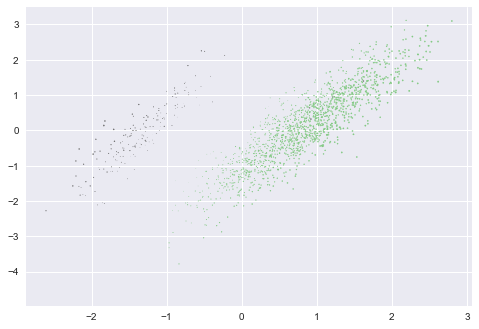

In [5]:
plt.scatter(X_train[:,0],X_train[:,1],X_train[:,2],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [6]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    hi = hypothesis(X,theta)
    e = -1*np.mean((y*np.log(hi)) + ((1-y)*np.log(1-hi)))
    return e
    
def gradient(X,y,theta):
    hi = hypothesis(X,theta)
    grad = -np.dot(X.T,(y-hi))
    m = X.shape[0]
    return grad/m
    
def gradDescent(X,y,lr=0.5, max_itr=500):
    n = X.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    
    for i in range(max_itr):
        e = error(X,y,theta)
        error_list.append(e)
        grad = gradient(X,y,theta)
        theta = theta - lr*grad
    return theta, error_list

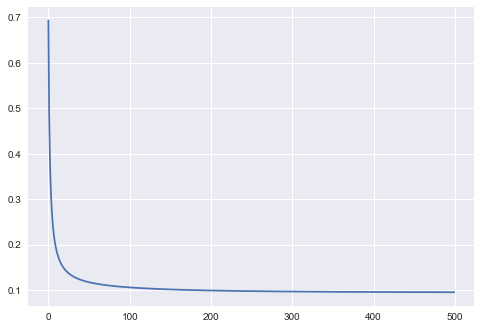

array([[-1.78203643],
       [ 1.19204401],
       [-3.58655303]])

In [7]:
theta, error_list = gradDescent(X, Y)
plt.plot(error_list)
plt.show()
theta

In [8]:
ones=np.ones((X_train.shape[0],1))
X_new_train=np.hstack((ones,X_train))
X_new_train.shape

(3000, 4)

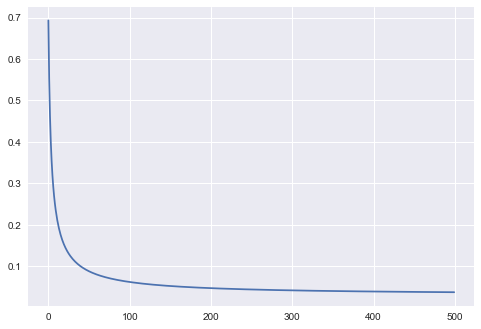

array([[-0.83262325],
       [-4.07340528],
       [ 2.48502446],
       [-2.85683045]])

In [9]:
theta, error_list = gradDescent(X_new_train, Y_train)
plt.plot(error_list)
plt.show()
theta

c:\users\aditya\appdata\local\programs\python\python39\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


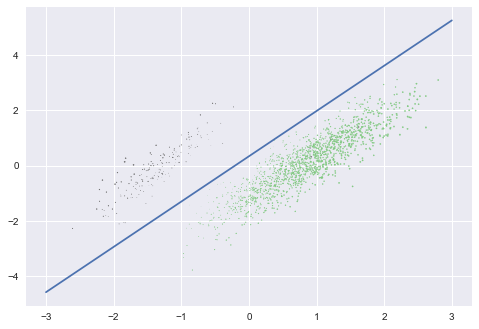

In [10]:
x1 = np.arange(-3,4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.plot(x1,x2)
plt.scatter(X_train[:,0],X_train[:,1],X_train[:,2],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [11]:
def predict(X,theta):
    h=hypothesis(X,theta)
    output=np.zeros(h.shape)
    output=output.astype('int')
    output[h>=0.5] = 1
    return output

In [12]:
ones=np.ones((X_test.shape[0],1))
X_new_test=np.hstack((ones,X_test))
preds = predict(X_new_test,theta)
preds.shape

(1000, 1)

In [14]:
df=pd.DataFrame(data=preds,columns=['label'])
df.head()
df.to_csv("predictions.csv",index=False)